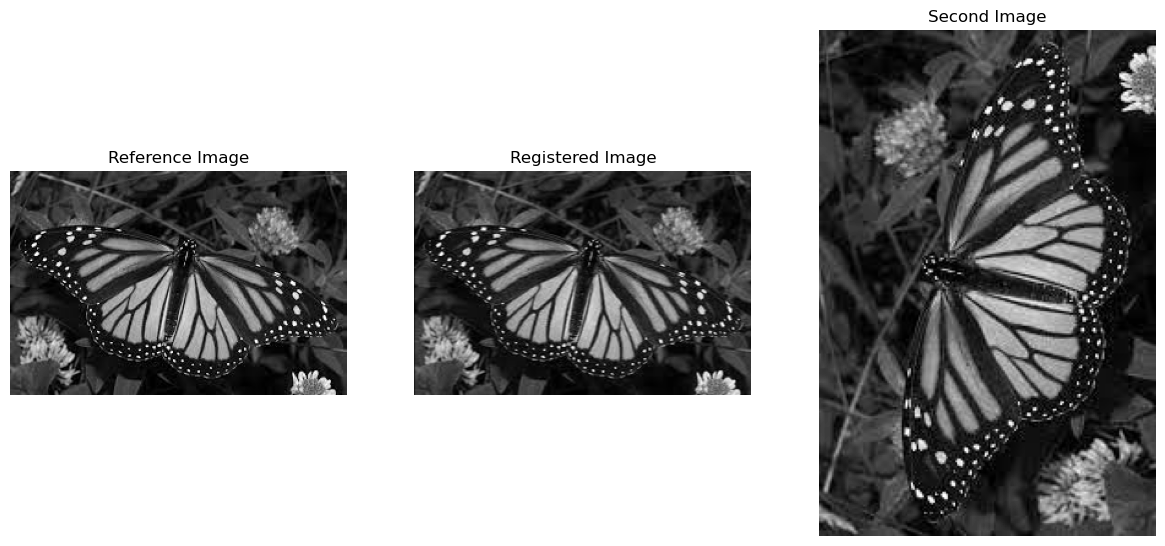

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the reference image and the second image
reference_image = cv2.imread('/Users/nandinidhiran/Downloads/edge_detection.jpeg', cv2.IMREAD_GRAYSCALE)
second_image = cv2.imread('/Users/nandinidhiran/Downloads/edge_detection_copy.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the images are loaded successfully
if reference_image is None or second_image is None:
    print("Error: Unable to load images.")
else:
    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors in both images
    keypoints_reference, descriptors_reference = sift.detectAndCompute(reference_image, None)
    keypoints_second, descriptors_second = sift.detectAndCompute(second_image, None)

    # Match descriptors between the reference image and the second image
    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(descriptors_reference, descriptors_second, k=2)

    # Apply ratio test to find good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Extract keypoints from the good matches
    points_reference = np.float32([keypoints_reference[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    points_second = np.float32([keypoints_second[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Estimate the transformation (homography) between the two images
    homography, _ = cv2.findHomography(points_second, points_reference, cv2.RANSAC)

    # Apply the transformation to map the second image onto the reference image
    registered_image = cv2.warpPerspective(second_image, homography, (reference_image.shape[1], reference_image.shape[0]))

    # Draw matching features on the concatenated image
    concatenated_image = np.hstack((image1, image2))
    matching_image = cv2.drawMatches(reference_image, keypoints_reference, registered_image, keypoints_second, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

    # Display the images
    plt.figure(figsize=(20, 8))
    
    plt.subplot(1, 4, 1)
    plt.imshow(reference_image, cmap='gray')
    plt.title('Reference Image')
    plt.axis('off')

    
    plt.subplot(1, 4, 2)
    plt.imshow(registered_image, cmap='gray')
    plt.title('Registered Image')
    plt.axis('off')

    
    plt.subplot(1, 4, 3)
    plt.imshow(second_image, cmap='gray')
    plt.title('Second Image')
    plt.axis('off')
    
    plt.show()